In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
def check_na_columns(df: pd.DataFrame) -> pd.Series:
    h = df.isna().sum()
    return h[h > 0]

check_na_columns(df)

Series([], dtype: int64)

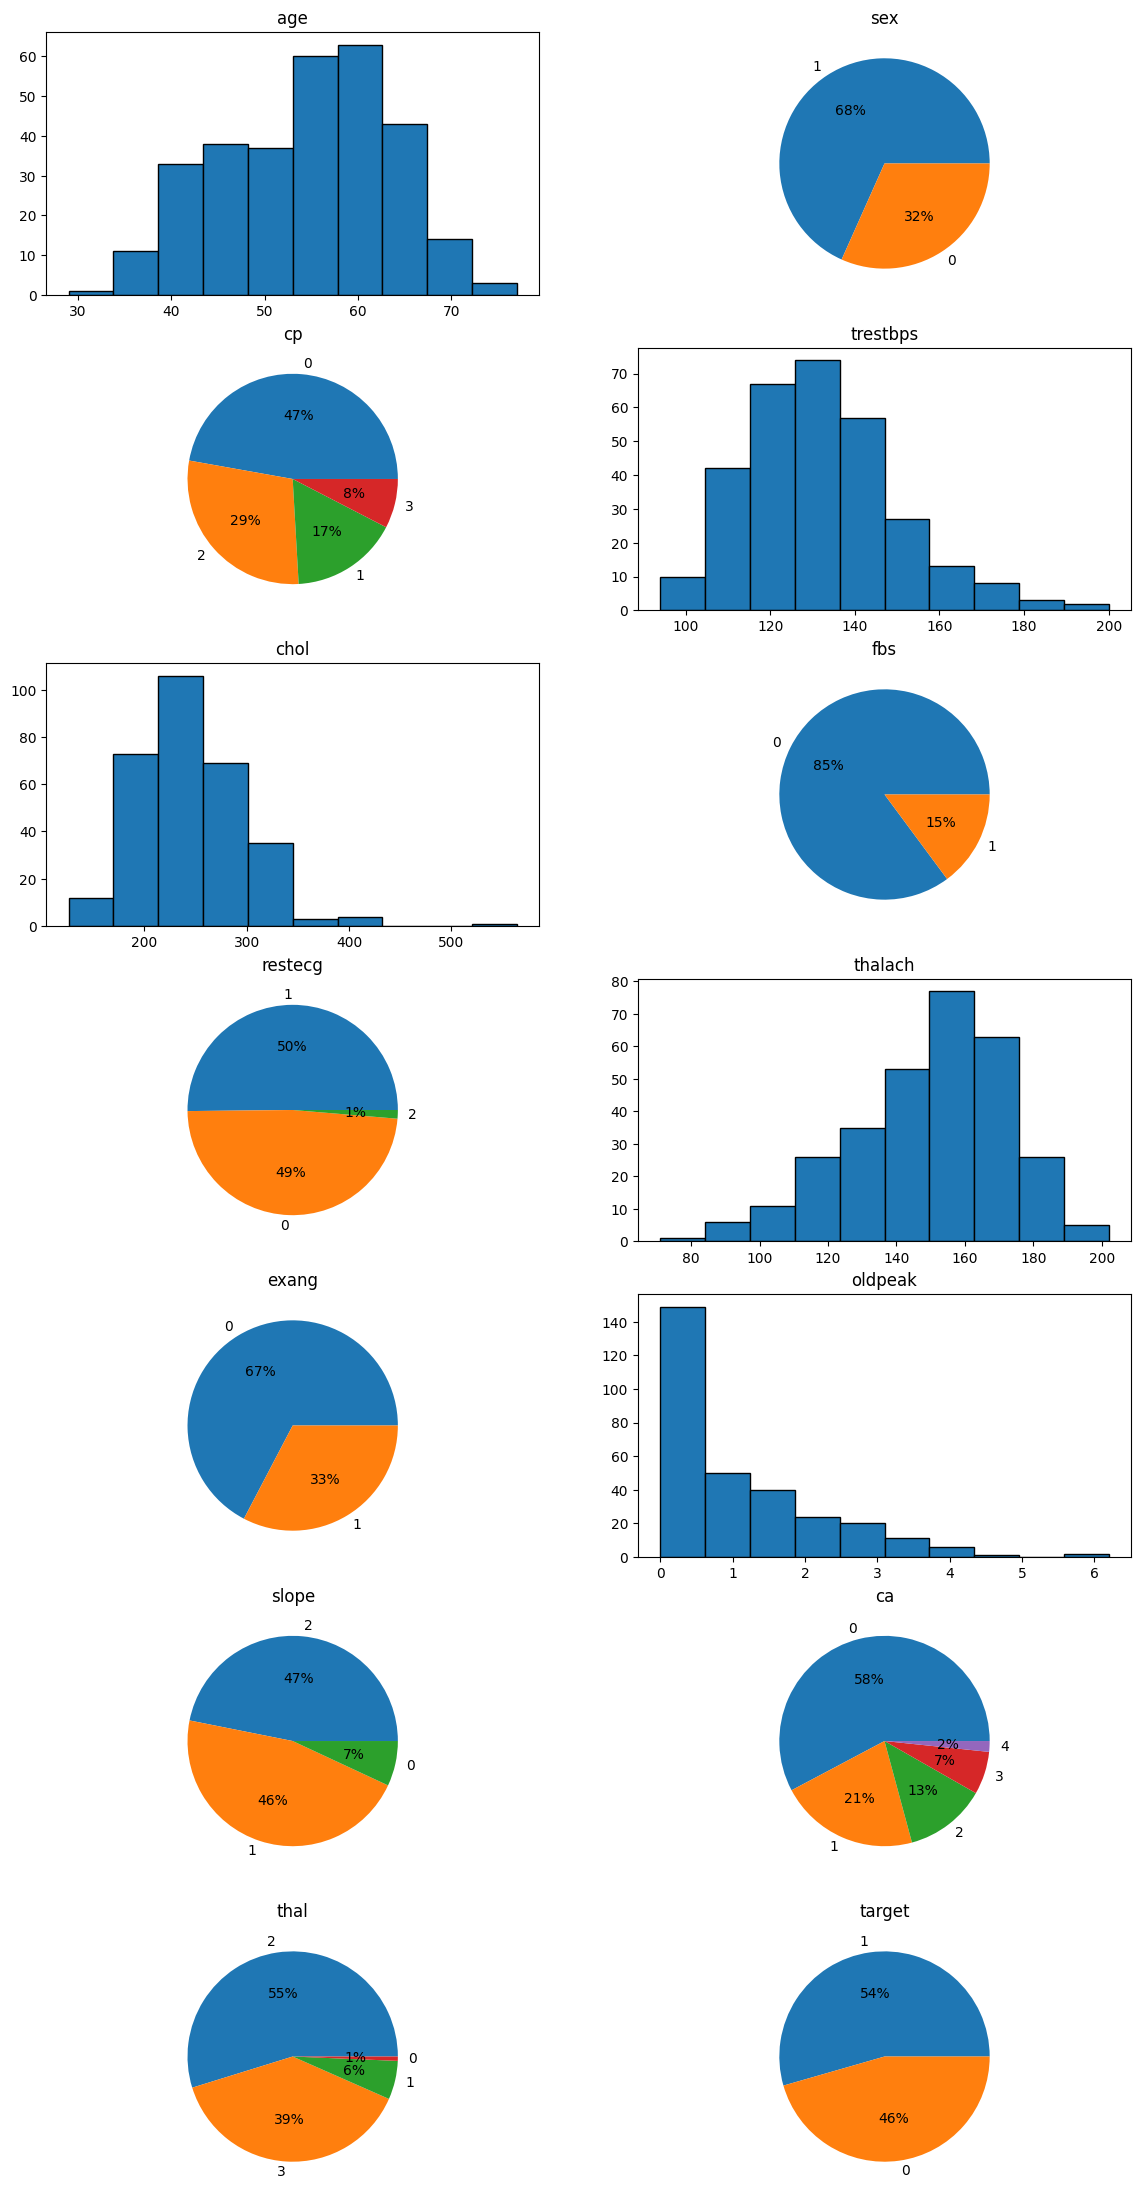

In [4]:
fig, ax = plt.subplots(7, 2, figsize=(14, 28))

for idx, column in enumerate(df.columns):
    vals = df[column].value_counts()
    if vals.shape[0] > 5:
        ax[idx // 2, idx % 2].hist(df[column], edgecolor='black')
    else:
        ax[idx // 2, idx % 2].pie(vals, labels=vals.index, autopct='%1.0f%%', )
    ax[idx // 2, idx % 2].set_title(column)
    
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


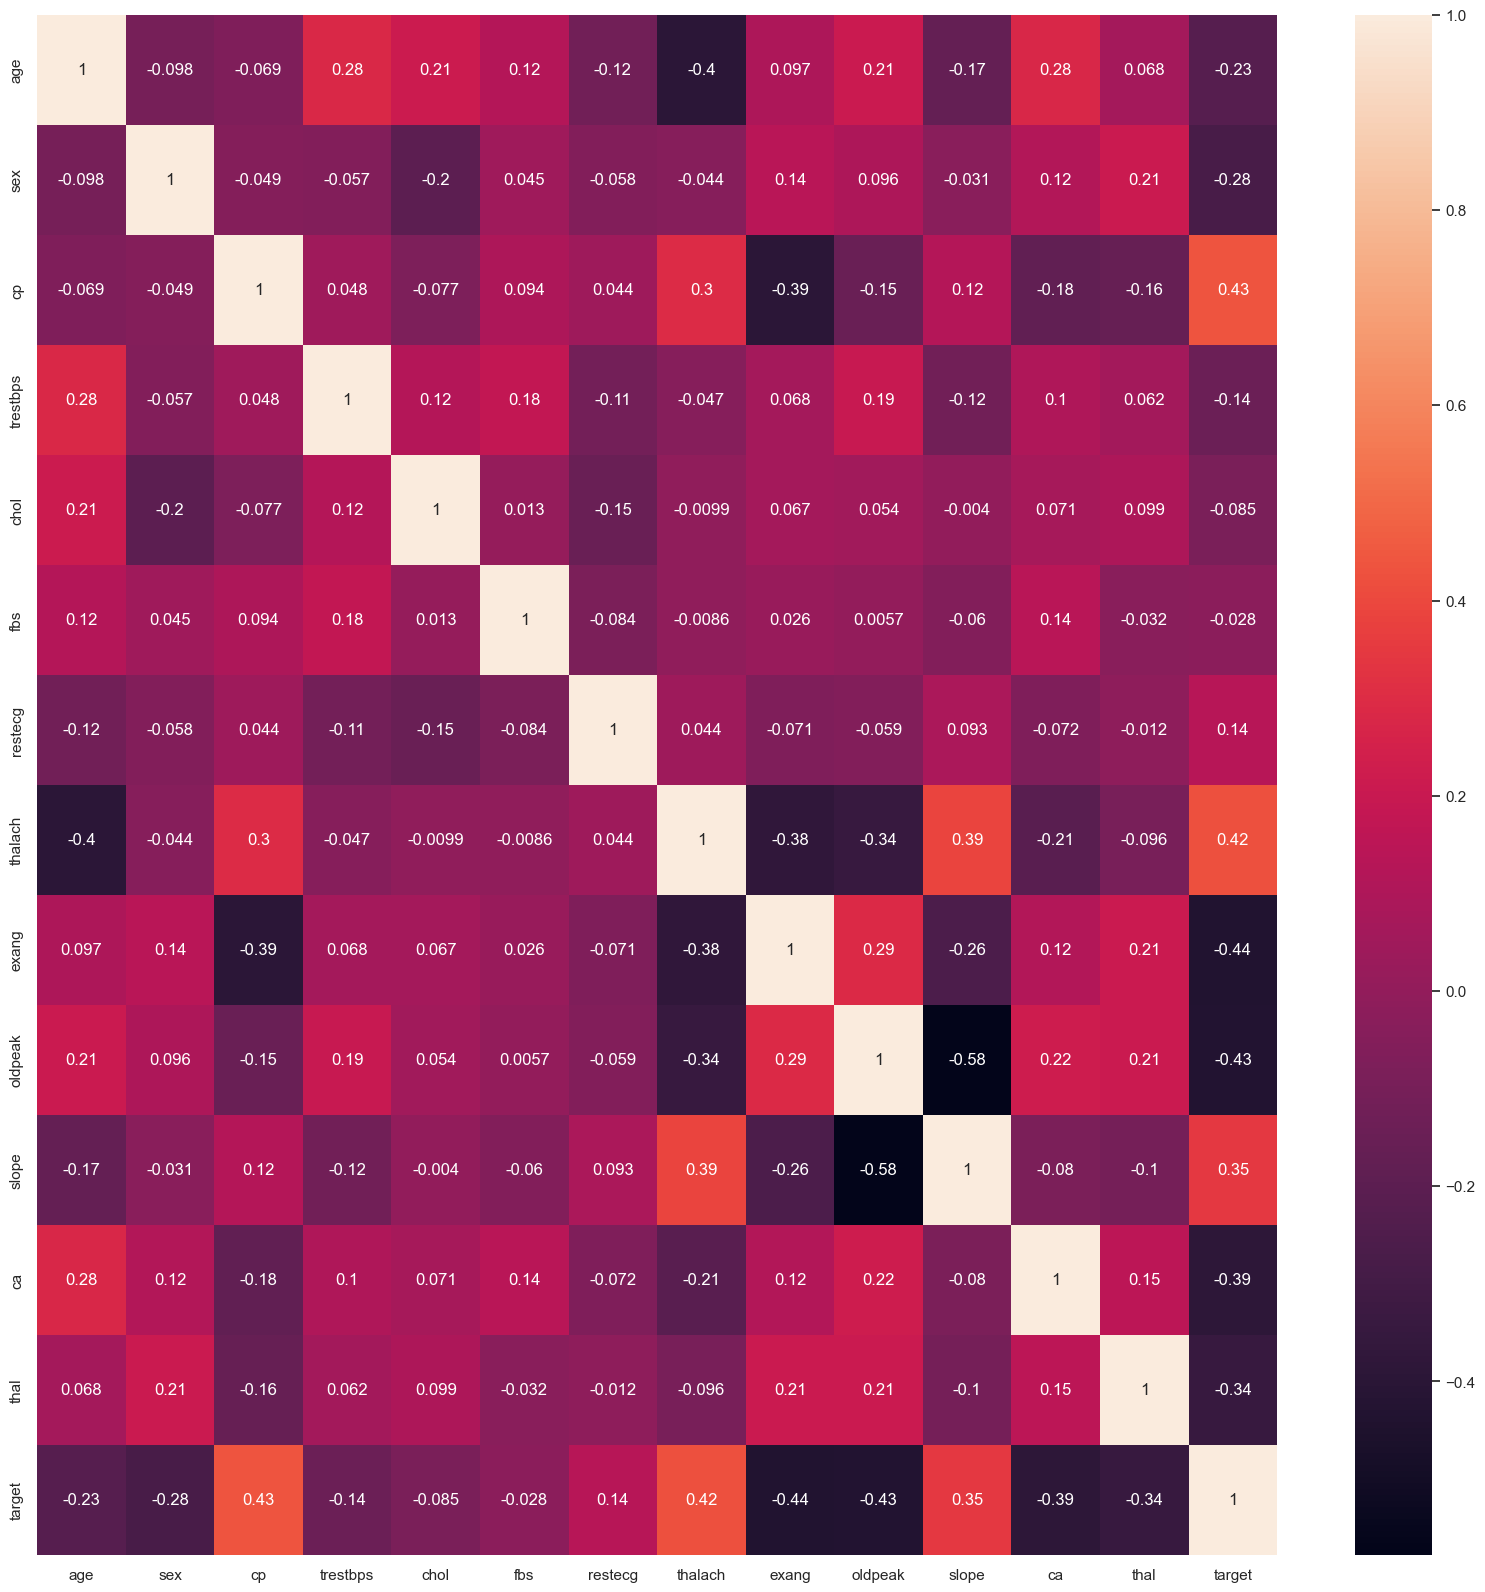

In [7]:
sns.set(rc={'figure.figsize': (20, 20)})
sns.heatmap(df.corr(), annot=True);

In [8]:
from sklearn.preprocessing import OneHotEncoder


X, y = df.drop('target', axis=1), df[['target']]
cat_columns = [column for column in X.columns if X[column].value_counts().shape[0] <= 5]
num_columns = [column for column in X.columns if X[column].value_counts().shape[0] > 5]

ohe = OneHotEncoder(drop='first')
X_cat, X_num = X[cat_columns], X[num_columns]
ohe.fit(X_cat)
X_new_cat = pd.DataFrame(ohe.transform(X_cat).toarray(), columns=ohe.get_feature_names_out(cat_columns))
X_final = pd.concat([X_new_cat, X[num_columns]], axis=1)
X_final.head()

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,...,ca_3,ca_4,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,63,145,233,150,2.3
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,37,130,250,187,3.5
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,41,130,204,172,1.4
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,56,120,236,178,0.8
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,57,120,354,163,0.6


In [9]:
from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(X_final, y, random_state=27, test_size=0.25)

In [10]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)
Xtest.head()

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,...,ca_3,ca_4,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.729167,1.000000,0.454338,0.633588,0.000000
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.562500,0.302326,0.251142,0.816794,0.129032
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.250000,0.209302,0.324201,0.770992,0.000000
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.520833,0.302326,0.301370,0.580153,0.064516
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.458333,0.302326,0.385845,0.656489,0.096774


In [11]:
from sklearn.linear_model import LogisticRegressionCV


lrcv = LogisticRegressionCV(Cs=[10 ** i for i in range(-2, 3)],
                            cv=5,
                            penalty='l2', solver='sag')
lrcv.fit(Xtrain, ytrain)

c:\Users\artse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\artse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\artse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\artse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\artse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], cv=5, solver='sag')

In [12]:
from sklearn.metrics import roc_auc_score


roc_auc_score(ytest, lrcv.predict(Xtest))

0.8473867595818816